# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**


<div style="background: lemonchiffon; margin:20px; padding: 20px; color: black;">
    <strong>Note</strong>
    <p>This Problem Set covers Labs 5 and 6 (and the corresponding course materials). However, principles covered in previous modules are still relevant (visualization, probability, etc.).</p>
    <p>Additionally, this is a <em>report</em>, a narrative description of your process and findings. Use full sentences. Limit bullet lists. You should be able to "hide code" and have the remaining text make sense.</p></div>


This is a problem about Abalone. Do you lack domain knowledge? **Google it**. Some common knowledge about volumes and weight will also help.

For the purposes of this assignment, assume that the overall question revolves around abalone rings. The target variable is rings because it is a predictor of age. This assignment is thus not a complete answer to the question but the first steps. Although you must follow the visualization guidelines from Module 4, the source material for this assignment comes from Modules 5 and 6 *only*. No linear regression. No Naive Bayes.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*. single value models (mean) or mathematical distributions.

<a id="contents"></a>
# Contents

1. [ETL](#step1)
2. [EDA](#step2)
3. [Statistical and Mathematical Modeling of the Target Variable](#step3)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import norm

## 1 <a id="step1">(ETL) Extract, Transform, Load the Data</a>
<a href="#contents">^ Contents</a>

This is the data dictionary for the Abalone data:

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The first step is to load the data from its remote location into a dataframe and make sure you have the data:

In [2]:
abalone = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv")

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

As a background, there are 9 variables (also called *features*):
* **sex** (categorical)
* **length** (numerical)
* **diameter** (numerical)
* **height** (numerical)
* **whole weight** (numerical)
* **shucked weight** (numerical)
* **viscera weight** (numerical)
* **shell weight** (numerical)
* **rings** (numerical)

### Domain Knowledge 

Based on our research, abalone are marine snails and the age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. However, because this process is time-consuming, we use the above measurements/features, which are easier to obtain, to predict age. The reason one would want to know the age of the Abalone is to prevent the overfishing of these creatures by suggesting minimum size limits thtat would maintain sufficient egg production. 

Source: https://anson.ucdavis.edu/~haochen/abalone_description.pdf
https://www.researchgate.net/publication/265049580_Size_limits_for_greenlip_abalone_in_Tasmania

We want to start with a causal loop diagram of the data we have in relation to the guided questions we asked (What are the factors influencing rings and therefore age?): 

1. sex $\rightarrow$ rings: this one is hard to answer. We must use data. 
2. length $\rightarrow$ rings: the larger the length the older they are 
3. diameter $\rightarrow$ rings: the wider diameter the older they are
4. height $\rightarrow$ rings: the larger the height the older they are
5. whole weight $\rightarrow$ rings: the larger the whole weight the older they are
6. shucked weight $\rightarrow$ rings: the larger the shucked weight the older they are
7. viscera weight $\rightarrow$ rings: the larger the viscera weight the older they are 
8. shell weight $\rightarrow$ rings: the larger the shell weight the older they are

Most of these are straighforward. Nevertheless, it may be interesting to see the relationships between other features that isn't charge.

### Mini ETL 

We may need to look at the file before loading it, to see if there are headers or other non-data information in the file (that we would need to skip).
We can do it from the notebook directly:

In [3]:
abalone.head()

NameError: name 'abalone' is not defined

Information does not have a header. Let us insert a header: 

In [4]:
abalone = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv", names=['Sex', 'Length', 'Diameter', 'Height','Whole Weight','Shucked Weight','Viscera Weight','Shell Weight','Rings'])
abalone.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


Information looks good. 

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   int64  
 2   Diameter        4177 non-null   int64  
 3   Height          4177 non-null   int64  
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscera Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


Using `info`, we get the information on all the data types. 
We can see that only `Sex` is represented as an object. 
As we noted, `Length`, `Diameter`, `Height`, and `Rings` have been converted to an integer. 
This may be ok for our purposes. 
Additionally, `Whole Weight`, `Shucked Weight`, `Viscera Weight`, and `Shell Weight` have been converted to a float.
Lastly, our categorical variables `Sex` may need to be converted to integers but not necessary.

`info` will also tell you about missing values.
Because the counts of each variable is equal to the total count, there are no missing values.

## 2 <a id="step2">(EDA) Exploratory Data Analysis</a>
<a href="#contents">^ Contents</a>

### EDA
Now we can start our EDA: 

Framework: 

1. Single Variable EDA

* [Sex](#Sex)
* [Length](#Length)
* [Diameter](#Diameter)
* [Height](#Height)
* [Whole_Weight](#Whole_Weight)
* [Shucked_Weight](#Shucked_Weight)
* [Viscera_Weight](#Viscera_Weight)
* [Shell_Weight](#Shell_Weight)
* [Rings](#Rings)

2. Pairwise Variable EDA, guided by our problem and question. 

Rings v. ? 

* [Sex](#RingsvsSex)
* [Length](#RingsvsLength)
* [Diameter](#RingsvsDiameter)
* [Height](#RingsvsHeight)
* [Whole_Weight](#RingsvsWhole_Weight)
* [Shucked_Weight](#RingsvsShucked_Weight)
* [Viscera_Weight](#RingsvsViscera_Weight)
* [Shell_Weight](#RingsvsShell_Weight)


### Abalone - Single Variables 

We will start with the single variable EDA of all features provided in the data. 

#### Sex

`Sex` is a categorical variable. More specifically, it is a variable that takes values of male (M), female (F), and infant (I). We can get a distribution of its values using `value_counts()`:

In [6]:
abalone["Sex"].value_counts().sort_index()

F    1307
I    1342
M    1528
Name: Sex, dtype: int64

Interestingly, the dataset has an almost equal distribution of females (32.29%) and infants (32.13%) but about a 4% (100 -64 = 36%, 36%-32% = 4%) higher datapoints for males. Guided by our problem, it would be interesting to see the features' means for the female and infant category that will allow us to understand makes each category different. 

<a href="#EDA">^ EDA</a>

#### Length

`Length` is a numerical variable that measures the longest shell measurement in milimeters. Given its positive casual relationship, we expect to see about 64% (F & M) of the data with bigger `Lengths`, that is, assuming, the Males/Females data that was collected are consider non-infants. Let's get a sense of the range of this variable by looking at the summary statistics:

In [7]:
abalone["Length"].describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: Length, dtype: float64

The minimum `length` is 15 mm and the maximum is 163 mm. This is a big range which tells me that the variable is definitely skewed. The mean is 104.8 and the median is 109 which suggests a left skewness. Recall that when the mean < median, this suggest a left- skewed distribution. Let's plot a histogram of the data using Freeman Diaconis bins. The use of Freeman Diaconis bins allows us to select the width of the bins to be used in a histogram. 

In [8]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

Freeman Diaconis:  4


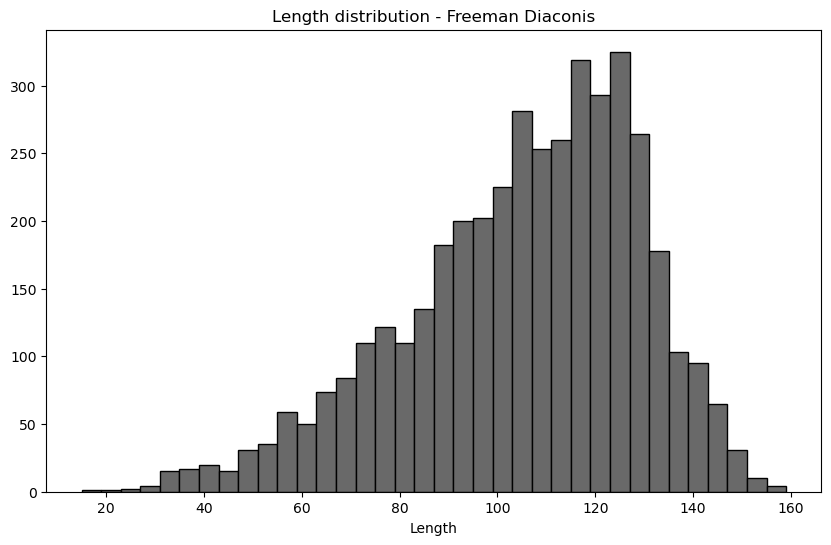

In [9]:
h = freeman_diaconis(abalone["Length"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Length"].min())
mx = int(abalone["Length"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Length"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Length distribution - Freeman Diaconis")
axes.set_xlabel("Length")

plt.show()
plt.close()

The distribution of the data looks slightly skewed left which makes some sense given if we assume that the males and females abalone account for about 68% of the data (assuming these are not infant), we can see that the information is center (median) at about 109 and a mean of 104 . Accouting for the infants information (which equates to about 32%) and their relative size (length) drives the mean to be smaller than the median. 

<a href="#EDA">^ EDA</a>

#### Diameter 

`Diameter` is a numerical variable that measures perpendicular to length (also measured in mm). Similarly, we should expect about 68% (Females & Males) of the data with bigger `Diameters`, that is, assuming, the Males/Females data that was collected are consider non-infants. Let's get a sense of the range of this variable by looking at the summary statistics:

In [10]:
abalone["Diameter"].describe()

count    4177.000000
mean       81.576251
std        19.847973
min        11.000000
25%        70.000000
50%        85.000000
75%        96.000000
max       130.000000
Name: Diameter, dtype: float64

The variable is definitely skewed left. The mean is 81.57 and the median is 85. The 1st quartile has a bigger range from the median than the 3rd quartile. Let's plot a histogram of the data using Freeman Diaconis bins: 

Freeman Diaconis:  3


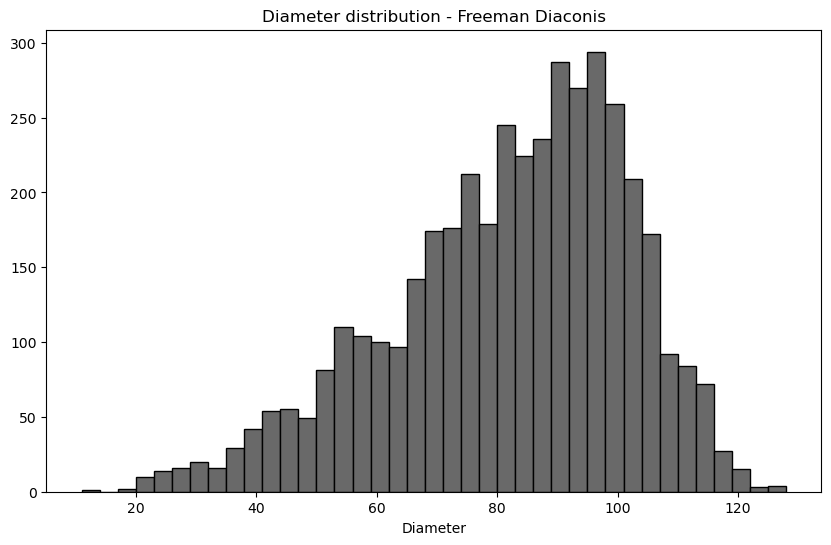

In [11]:
h = freeman_diaconis(abalone["Diameter"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Diameter"].min())
mx = int(abalone["Diameter"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Diameter"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Diameter distribution - Freeman Diaconis")
axes.set_xlabel("Diameter")

plt.show()
plt.close()

The distribution of the data is skewed left. Similarly, if we assume that the males and females abalone account for about 68% of the data (assuming these are not infant), we can see that the information is center (median) at 85 and a mean of 81.58 . Accouting for the infants information (which equates to about 32%) and their relative size diameter drives the mean to be smaller than the median. The beginning tail whip is creating this skewness. 

<a href="#EDA">^ EDA</a>

#### Height 

`Height` is a numerical variable that measures the height of the abalone with meat in shell. Given our research, the height of a mature abalones do not change much. However, it is important to convey that since the height of the abalone is measured with the meat in shell. As the abalone reaches maturity,  meat in shell grows, and thus, the height does too. After maturity, the abalone stays the same in terms of height. Let's get a sense of the range of this variable by looking at the summary statistics:

In [12]:
abalone["Height"].describe()

count    4177.000000
mean       27.903280
std         8.365411
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       226.000000
Name: Height, dtype: float64

Given there is a max of 226, this indicates that there must be some outliers in the information. The height cannot be 8x the height of the mean. Either this datapoint was a typo or since this abalone is so off the mean, it is best not to include it in our data. Nonetheless, the mean and median of `height` are very close to each other (27.9 and 28). This indicates that the no skewness and the information can be normally distributed. Let's plot a histogram of the data using Freeman Diaconis bins: 

Freeman Diaconis:  1


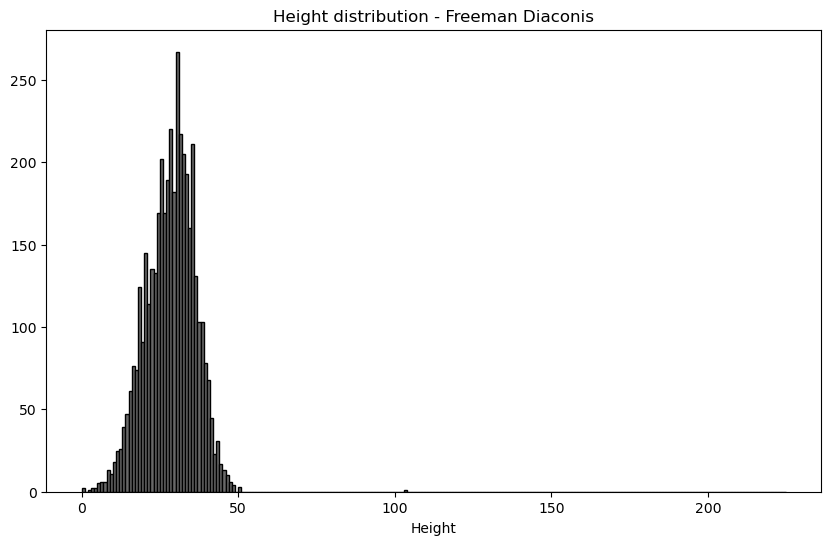

In [13]:
h = freeman_diaconis(abalone["Height"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Height"].min())
mx = int(abalone["Height"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Height"],bins=bins, histtype='bar',color="DimGray", ec='black')
axes.set_title("Height distribution - Freeman Diaconis")
axes.set_xlabel("Height")

plt.show()
plt.close()

As we fortold, the data looks normally distributed. However, there are two data points that seems to extend the axis of the histogram, indicating that these are our outlier. In order to identify which datapoints this are, from the graph above, we can note that biggest `Height` of an abalone that is still close to the distribution is around 50. Therefore, any datapoint that has a `Height` greater than 50 may indicate that these are our outliers. To discover them, we do the following: 

In [14]:
 print(abalone[abalone["Height"] > 50])

     Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
1417   M     141       113     103         442.0           221.5   
2051   F      91        71     226         118.8            66.4   

      Viscera Weight  Shell Weight  Rings  
1417            97.3         102.4     10  
2051            23.2          26.7      8  


These two data points in `Height` throw off our data. Let's see if we can run a histogram without them. In order to do this, let's first remove these points and run a separte dataframe that has all `Height` datapoints without index rows 1417 and 2051. 

In [15]:
abalone2 = abalone[~abalone["Height"].isin([103, 226])]
abalone2["Height"].describe()

count    4175.000000
mean       27.837844
std         7.697834
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        50.000000
Name: Height, dtype: float64

When we remove the two outliers, we notice a slight skew left in the data but nothing big. Now let's replot this:

Freeman Diaconis:  1


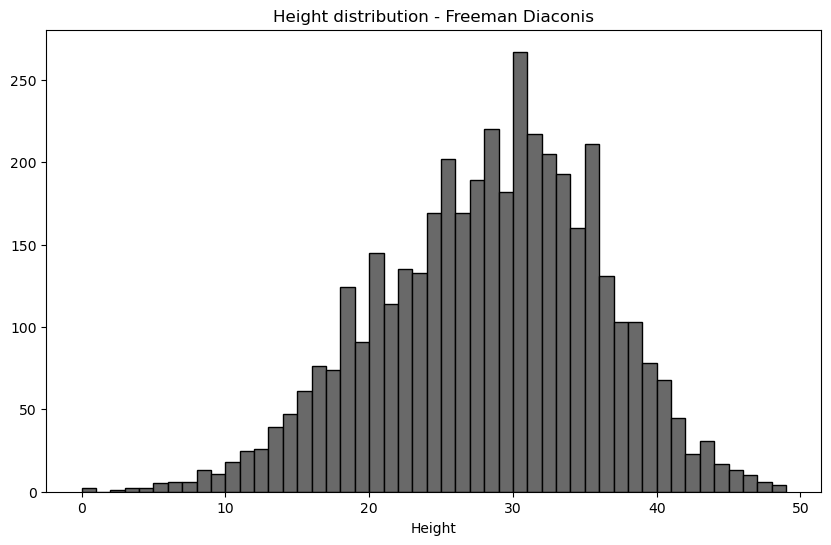

In [16]:
h = freeman_diaconis(abalone2["Height"])
print("Freeman Diaconis: ", h)
mn = int(abalone2["Height"].min())
mx = int(abalone2["Height"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone2["Height"],bins=bins, histtype='bar', color="DimGray", ec='black')
axes.set_title("Height distribution - Freeman Diaconis")
axes.set_xlabel("Height")

plt.show()
plt.close()

As mentioned before, when we remove the outliers, the distribution has a slight skew left (27.84 < 28) but nothing too serious. The distribution of the data still looks normally distributed.

<a href="#EDA">^ EDA</a>

#### Whole_Weight

`Whole Weight` is a numerical variable the measures the whole abalone's weight. Based on our research, the weight of a matured abalone weighs between 100-250 grams. Let's get a sense of the range of this variable by looking at the summary statistics:

In [17]:
abalone["Whole Weight"].describe()

count    4177.000000
mean      165.748432
std        98.077804
min         0.400000
25%        88.300000
50%       159.900000
75%       230.600000
max       565.100000
Name: Whole Weight, dtype: float64

Based on the summary statistics, the dataset is skewed right (positive skew). The mean is greater than the median (165.74 > 159.9) indicating that more than half of the data is located here. Let's look at a historgram to see how the distribution falls: 

Freeman Diaconis:  17


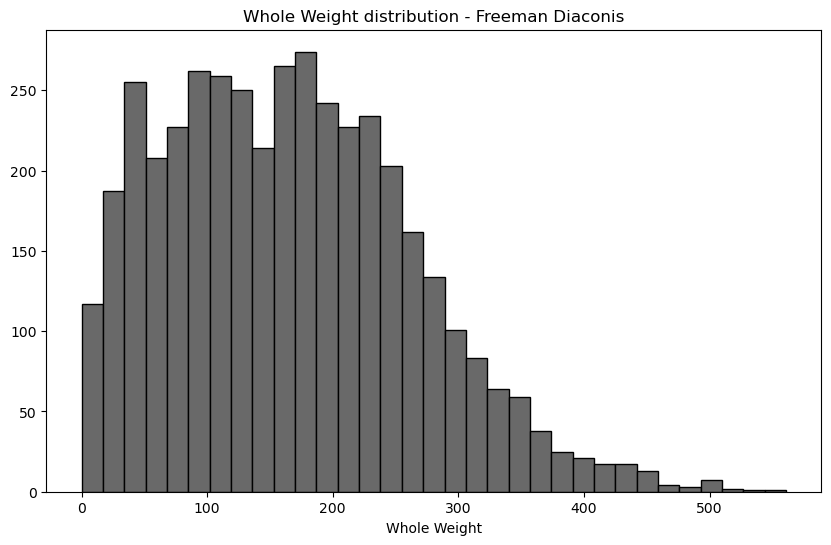

In [18]:
h = freeman_diaconis(abalone["Whole Weight"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Whole Weight"].min())
mx = int(abalone["Whole Weight"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Whole Weight"],bins=bins, histtype='bar',color="DimGray", ec='black')
axes.set_title("Whole Weight distribution - Freeman Diaconis")
axes.set_xlabel("Whole Weight")

plt.show()
plt.close()

From the distribution, we can definitely see the data is skewed right which makes some sense. The bullwhill effect at the beginning may be due to the 32% of data for infants that was collected. Usually, as infants mature, their weight increases because their shells and meat began to develop. We can see this trend in the distribution. It also important to note that because an abalone's shell grows in propotion to its age (up to 8 in of shell based on our research), this weight accounts for the shell's growth and meat growth. We do see the majority of the mature abalone in the range indicated by our research (100-250 g).

<a href="#EDA">^ EDA</a>

#### Shucked_Weight

`Shucked Weight` is a numerical variable that measures the weight of the meat of the abalone. I assume that the weight of the meat should behave very similar as the weight of the whole abalone. That is, as the abalone matures, the weight of the meat increase. Let's get a sense of the range of this variable by looking at the summary statistics:

In [19]:
abalone["Shucked Weight"].describe()

count    4177.000000
mean       71.873498
std        44.392590
min         0.200000
25%        37.200000
50%        67.200000
75%       100.400000
max       297.600000
Name: Shucked Weight, dtype: float64

Based on the summary statistics, the dataset is skewed right (positive skew). The mean is greater than the median (71.87 > 67.2) indicating that more than half of the data is located here. The weight of the meat of the abalone has a high standard deviation depicting a big dispersion in the dataset. Let's look at a historgram to see how the distribution falls: 

Freeman Diaconis:  7


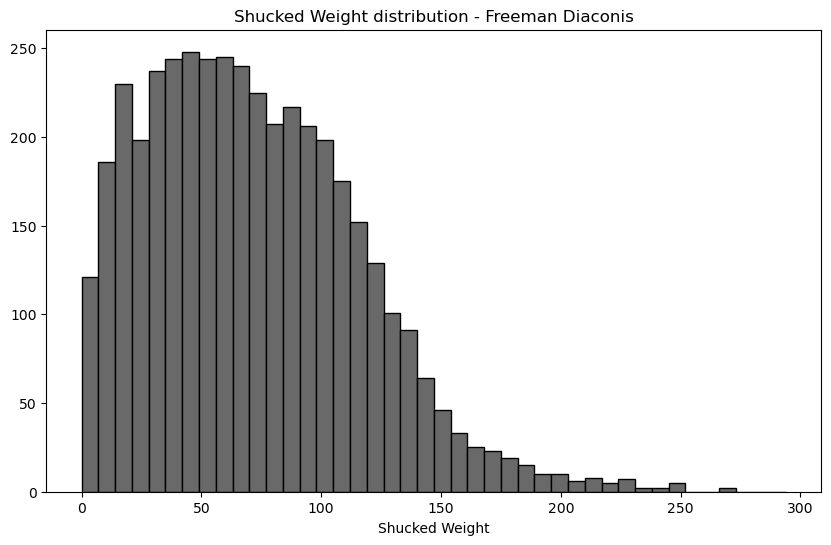

In [20]:
h = freeman_diaconis(abalone["Shucked Weight"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Shucked Weight"].min())
mx = int(abalone["Shucked Weight"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Shucked Weight"],bins=bins, histtype='bar',color="DimGray", ec='black')
axes.set_title("Shucked Weight distribution - Freeman Diaconis")
axes.set_xlabel("Shucked Weight")

plt.show()
plt.close()

From the distribution, we can definitely see the data is skewed right. As mentioned before, the bullwhill effect at the beginning may be due to the 32% of data for infants that was collected. Usually, as infants mature, their weight of meat also grows. We can see this trend in the distribution. It is also important to note that the weight of meat of each abalone accounts to about half of the weight of the whole abalone (Avg. weight of whole abalone: 165, Avg. weight of meat: 71). 

<a href="#EDA">^ EDA</a>

#### Viscera_Weight

`Viscera Weight` is a numerical variable that measures the gut weight (after bleeding) of the abalone. I assume this feature also follows the behavior of the previous two weights (Shucked Weight and Whole Weight). It is appears that they way they captured the data is through a process through which abalone's are captured for food consumption, weighed wholly, weighed after removal of meat, then, weighed after guts are removed, and finally, weighed with just the shell. With this said, how much of the viscera weight is accounted from the whole weight? But first, let's get a sense of the range of this variable by looking at the summary statistics:

In [21]:
abalone["Viscera Weight"].describe()

count    4177.000000
mean       36.118722
std        21.922850
min         0.100000
25%        18.700000
50%        34.200000
75%        50.600000
max       152.000000
Name: Viscera Weight, dtype: float64

Yes, this is very similar behavior. The dataset is skewed right (positive skew). The mean is greater than the median (36.12 > 34.2) indicating that more than half of the data is located here. The visceral weight accounts to about 20% of the whole weight of the abolone.  Let's look at a historgram to see how the distribution falls: 

Freeman Diaconis:  3


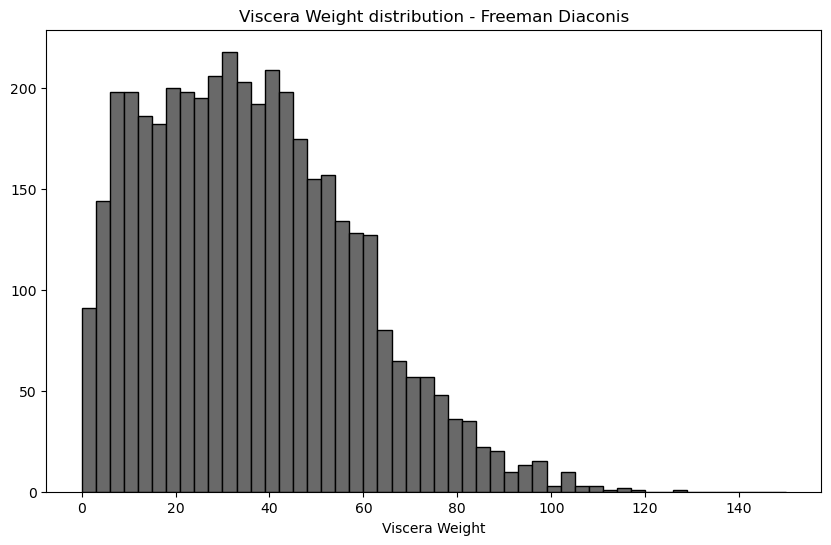

In [22]:
h = freeman_diaconis(abalone["Viscera Weight"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Viscera Weight"].min())
mx = int(abalone["Viscera Weight"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Viscera Weight"],bins=bins, histtype='bar',color="DimGray", ec='black')
axes.set_title("Viscera Weight distribution - Freeman Diaconis")
axes.set_xlabel("Viscera Weight")

plt.show()
plt.close()

From the distribution, we can definitely see the data is skewed right. The behavior is very similar to the other two weights. 

<a href="#EDA">^ EDA</a>

#### Shell_Weight

`Shell Weight` is a numerical variable that measures the weight of the shell. The behavior of this feature should be very similar to the other weights. Let's get a sense of the range of this variable by looking at the summary statistics:

In [23]:
abalone["Shell Weight"].describe()

count    4177.000000
mean       47.766172
std        27.840534
min         0.300000
25%        26.000000
50%        46.800000
75%        65.800000
max       201.000000
Name: Shell Weight, dtype: float64

The behavior is indeed the same as all other weights. However, it is important to note that the shell of an abalone accounts to about 30% for the whole weight of an abalone. 

Freeman Diaconis:  4


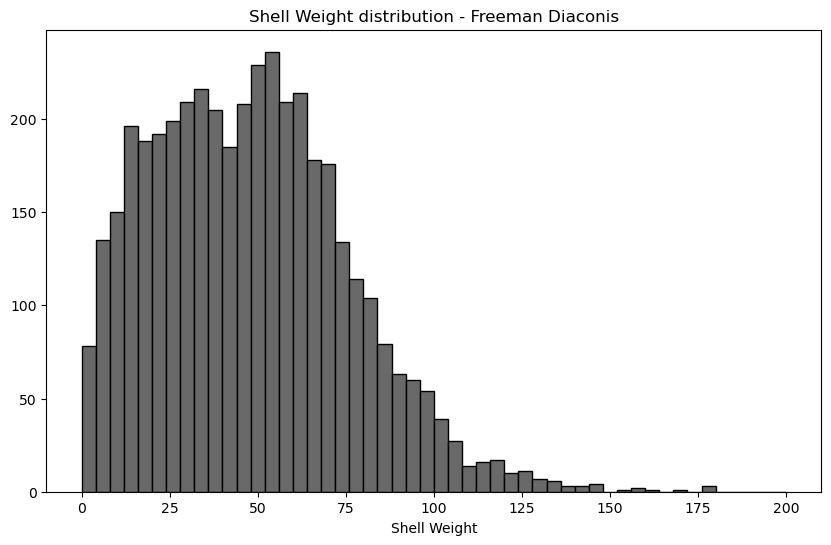

In [24]:
h = freeman_diaconis(abalone["Shell Weight"])
print("Freeman Diaconis: ", h)
mn = int(abalone["Shell Weight"].min())
mx = int(abalone["Shell Weight"].max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone["Shell Weight"],bins=bins, histtype='bar',color="DimGray", ec='black')
axes.set_title("Shell Weight distribution - Freeman Diaconis")
axes.set_xlabel("Shell Weight")

plt.show()
plt.close()

From the distribution, we can definitely see the data is skewed right. The behavior is very similar to the other three weights. To summarize, the shell is about 30% of the whole weight of the abalone, the visceras is about 20% of the whole weight of the abalone, and the meat (shucked weight) accounts for about 50% of the whole abalone.

<a href="#EDA">^ EDA</a>

#### Rings

`Rings` is a numerical variable and our target variable. Through `Rings` we can discover the age of the abalone. For every 1.5 rings, the abalone is one year old. Let's get a sense of the range of this variable by looking at the summary statistics:

In [25]:
abalone["Rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

Based on the summary statistics, it looks like the data is slightly skewed right (mean: 9.93 > median: 9). Most of the information is centered between 9 - 11 rings, signifying the age of abalone are between 6 years old to 7 years old. Let's look at a historgram to see how the distribution falls:  

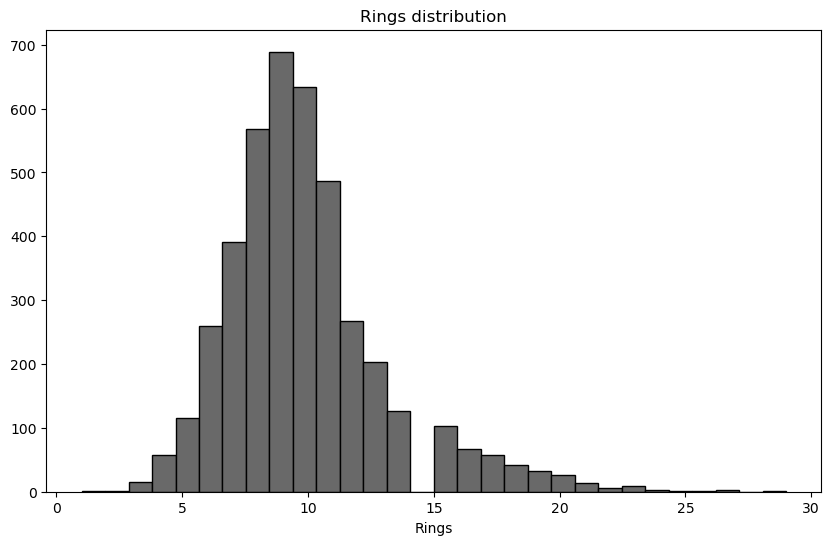

In [26]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone[ "Rings"], histtype='bar', bins = 30, color="DimGray", ec='black')
axes.set_xlabel( "Rings")
axes.set_title("Rings distribution")

plt.show()
plt.close()

The distribution looks slightly skewed right (positive). It looks very normal with more than half of datapoints closer to the mean. Given rings give a good indication of the age of the abalone and 68% of the data is considered non-infant, it is fair to say that a mature abalone is between 9-11 rings. In other words, a mature abalone is considered to be between 6 - 7 years old. We should conclude this in our pairwise comparisons and exploration.   

<a href="#EDA">^ EDA</a>

### Abalone - Pairwise Variable EDA

Given our guidance, we'll look at 7 variables in relation to `Rings`. Along the way, questions may be suggested and answered within. In addition, the following are some helper functions for our EDA problem. 

<a href="#EDA">^ EDA</a>

In [27]:
def classify_correlation(r):
    r = abs(r)
    if r < 0.16:
        return "very weak"
    if r < 0.29:
        return "weak"
    if r < 0.49:
        return "low"
    if r < 0.69:
        return "moderate"
    if r < 0.89:
        return "strong"
    return "very strong"

In [28]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    r = stats.pearsonr(data[x], data[y])[0]
    print( "r   =", r, f"({classify_correlation(r)})")
    rho = stats.spearmanr(data[x], data[y])[0]
    print( "rho =", rho, f"({classify_correlation(rho)})")

In [29]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [30]:
def lowess_scatter(data, x, y, jitter=0.0, skip_lowess=False):

    if skip_lowess:
        fit = np.polyfit(data[x], data[y], 1)
        line_x = np.linspace(data[x].min(), data[x].max(), 10)
        line = np.poly1d(fit)
        line_y = list(map(line, line_x))
    else:
        lowess = sm.nonparametric.lowess(data[y], data[x], frac=.3)
        line_x = list(zip(*lowess))[0]
        line_y = list(zip(*lowess))[1]

    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    xs = data[x]
    if jitter > 0.0:
        xs = data[x] + stats.norm.rvs( 0, 0.5, data[x].size)

    axes.scatter(xs, data[y], marker="o", color="DimGray", alpha=0.5)
    axes.plot(line_x, line_y, color="DarkRed")

    title = "Plot of {0} v. {1}".format(x, y)
    if not skip_lowess:
        title += " with LOWESS"
    axes.set_title(title)
    axes.set_xlabel(x)
    axes.set_ylabel(y)

    plt.show()
    plt.close()

As we have just seen, the rings data has a very normal distribution with some slight right (positive) skewness on it. Generally, this is a result of the mixture of processes that are creating distinct subgroups or population in the data. The question is where we can identify these subgroups using the data we have.

#### RingsvsSex

It is possible that the non-infant category we discovered in the single EDA (which accounts to almost 68%) have a higher number of rings and thus, an older age. Because this pairwise correlation is marked by a categorical variable and a numerical variable, using summary statistics in relation to each other gives us the perspective we are looking for:

In [31]:
describe_by_category(abalone, "Rings", "Sex", transpose=True)

Sex              F            I            M
count  1307.000000  1342.000000  1528.000000
mean     11.129304     7.890462    10.705497
std       3.104256     2.511554     3.026349
min       5.000000     1.000000     3.000000
25%       9.000000     6.000000     9.000000
50%      10.000000     8.000000    10.000000
75%      12.000000     9.000000    12.000000
max      29.000000    21.000000    27.000000


As we can see, the average ring number for an infant is 7.89 while the average ring number for non-infants (M/F) is 11. This indicates that are assumptions were correct. An infant is considered an infant if the range of rings is less than 9 rings. That is, an infant abalone is usually less than 6 years old (9/1.5 = 6). Anything greater than that is considered non-infant or mature. Moreover, for mature stats, it is important to convey that the average ring numbers for females is greater than the male's average ring numbers for this dataset. Although not significantly, the average of both genders centers around 11. This could be because the number of datapoints for males is greater than the females. Let's generate side by side histograms of rings by sex:

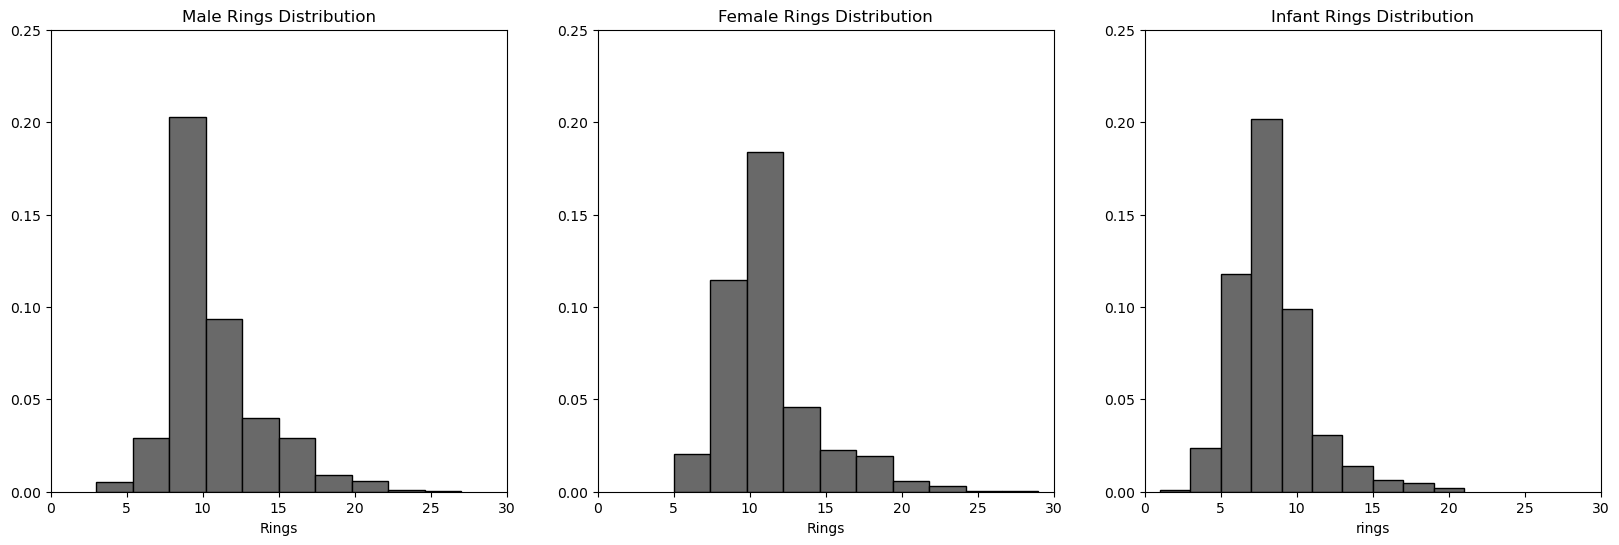

In [32]:
grouped = abalone.groupby("Sex")
figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 3, 1)
axes.hist(grouped["Rings"].get_group("M"),histtype='bar',color="DimGray", ec='black',density=True)
axes.set_title("Male Rings Distribution")
axes.set_xlabel("Rings")
axes.set_ylim((0,0.25))
axes.set_xlim((0,30))

axes = figure.add_subplot(1, 3, 2)
axes.hist(grouped["Rings"].get_group("F"),histtype='bar',color="DimGray", ec='black',density=True)
axes.set_title("Female Rings Distribution")
axes.set_xlabel("Rings")
axes.set_ylim((0,0.25))
axes.set_xlim((0,30))

axes = figure.add_subplot(1, 3, 3)
axes.hist(grouped["Rings"].get_group("I"),histtype='bar',color="DimGray", ec='black',density=True)
axes.set_title("Infant Rings Distribution")
axes.set_xlabel("rings")
axes.set_ylim((0,0.25))
axes.set_xlim((0,30))

plt.show()
plt.close()

The distribution of all categories are very similar. They all seem to be normally distributed with some slight right skewness. The only difference between them is the where the center of the data is located.  While males and females abalone have centers around 11, infants have centers around 8.

#### RingsvsLength

We can definitely expect to see the bigger the length, the more rings as we denoted in our casual relationship. Since this pairwise comparison is between two numerical variables, we can start by seeing the correlation of the two variables. 

In [33]:
correlation(abalone, "Length", "Rings")

Correlation coefficients:
r   = 0.5567195769296154 (moderate)
rho = 0.6043853354046326 (moderate)


Pearson's correlation coefficient, $r$, is only 0.557 which indicates a moderate positive relationship. Spearman's is more interesting at 0.604 which might indicate that at least a medium monotonic relationship exists.  This suggest that the length of a abalone is moderately significantly to the number of rings and thus, the age. Let's plot the data using Lowess. That is by using locally weighted smoothing (LOWESS), this method of regression analysis creates a smooth line through a scatterplot in order to see the trend between both variables. 

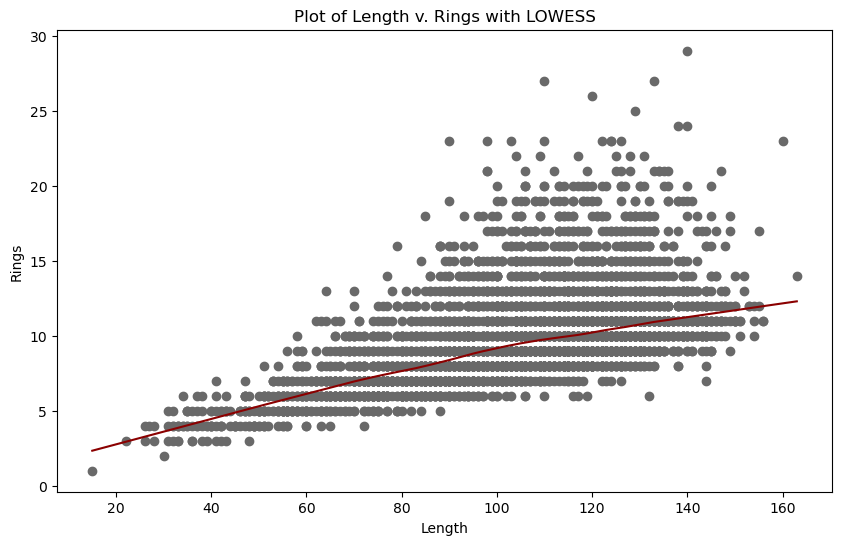

In [34]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Length"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Length"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Length v. Rings with LOWESS")
axes.set_xlabel( "Length")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

Through this scatterplot and the lowess line, we can see that there is indeed a postive linear relationship between length and rings. That is, the bigger the length, the more rings and the older the abalone. 

#### RingsvsDiameter

As we denoted in our casual relationship, we can definitely expect to see the bigger the diameter, the more rings. Since this pairwise comparison is between two numerical variables, we can start by seeing the correlation of the two variables. 

In [35]:
correlation(abalone, "Diameter", "Rings")

Correlation coefficients:
r   = 0.5746598513059147 (moderate)
rho = 0.6228950050921535 (moderate)


Similar to length, Pearson's correlation coefficient, $r$, is only 0.574 which indicates a moderate positive relationship. Spearman's is more interesting at 0.622 which might indicate a medium monotonic relationship exists. This correlation is bigger than that of length indicating this variable may be better indicator for the number of rings, and thus, age. Let's plot the relationship:

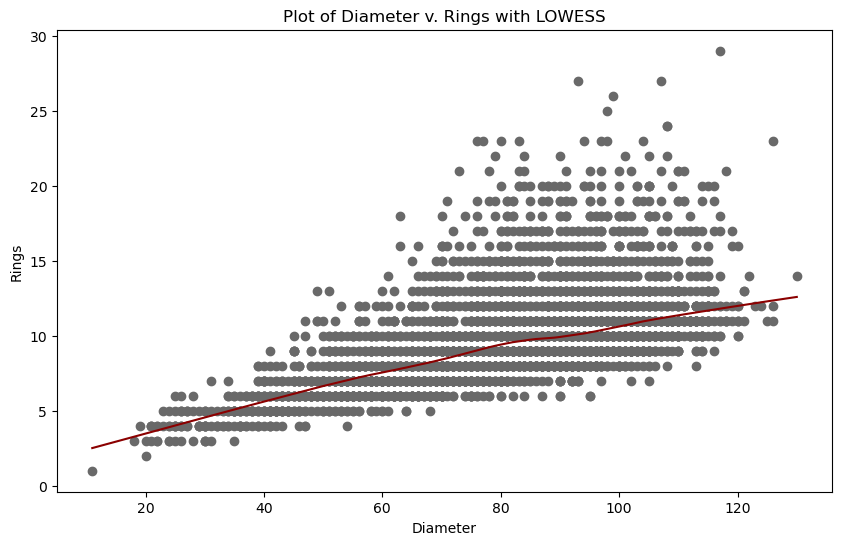

In [36]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Diameter"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Diameter"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Diameter v. Rings with LOWESS")
axes.set_xlabel( "Diameter")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

There is a positive linear relationship between both variables indicating that the bigger the diameter of abalone, the more rings it has, and thus, the older the abalone. 

#### RingsvsWhole_Weight

Whole weight may prove to be important in our analysis. The initial assumption is that the bigger the weight, the more rings the abalone has, and thus, the older it is. To begin comparing numerical variables, let's first check the correlation of the these two variables. 

In [37]:
correlation(abalone, "Whole Weight", "Rings")

Correlation coefficients:
r   = 0.5403896769238999 (moderate)
rho = 0.6308319554663986 (moderate)


The correlation is moderate. This suggest that the whole weight may be the an important feature to predicting the rings of an abalone and thus, its age. Let's visualize the relationship: 

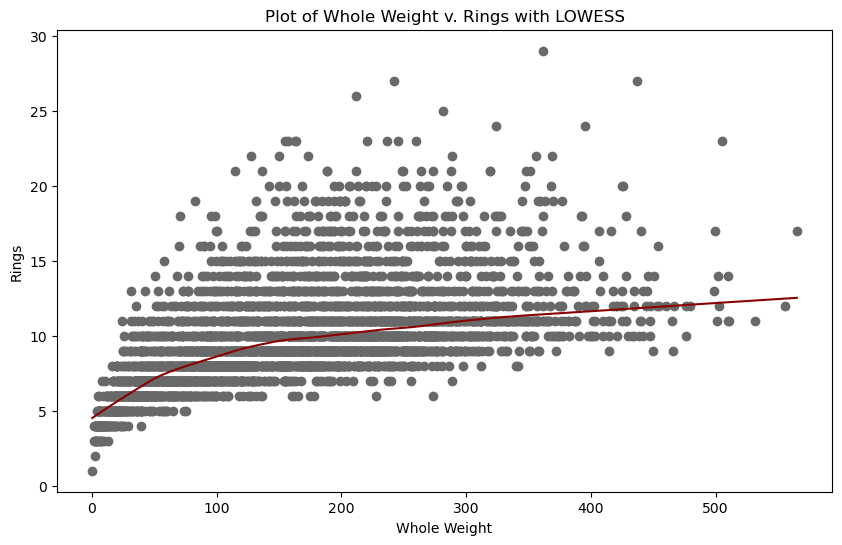

In [38]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Whole Weight"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Whole Weight"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Whole Weight v. Rings with LOWESS")
axes.set_xlabel( "Whole Weight")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

Looking at the scatterplot, its seems that there is a logarithmic trendline that depicts the more the abalone weigh, the more rings it has. However, the trendline also caps out suggesting that once the abalone matures, its rate of gaining weight decreases. That is, as an infant abalone reaches maturity, there weight significantly increases. This may be due to the increase in side of meat of the abalone, visceras, and shell. However, the rate of weight of abalones significantly decreases once they reach maturity (> 11 rings). Abalones won't gain as much weight the older they get. 

#### RingsvsShucked_Weight

Given that the shucked is the meat of the abalone and part of the whole weight of the abalone, the assumption is that the Shucked Weight will behave very similar to the Whole Weight vs. number of rings. Let's see: 

In [39]:
correlation(abalone, "Shucked Weight", "Rings")

Correlation coefficients:
r   = 0.42088365794521326 (low)
rho = 0.5394199820834579 (moderate)


The correlation of the Shucked weight is less than the whole weight but still moderately relevant. This is mainly due to the fact that the shucked weight has a higher standard deviation for meat weight than does the whole weight. This could be due to the process of collecting the Shucked Weight. That is, to cut the meat of the abalone for weighing , it could be that the cuts are not uniform and thus creating high deviations. Let's look at the relationship:

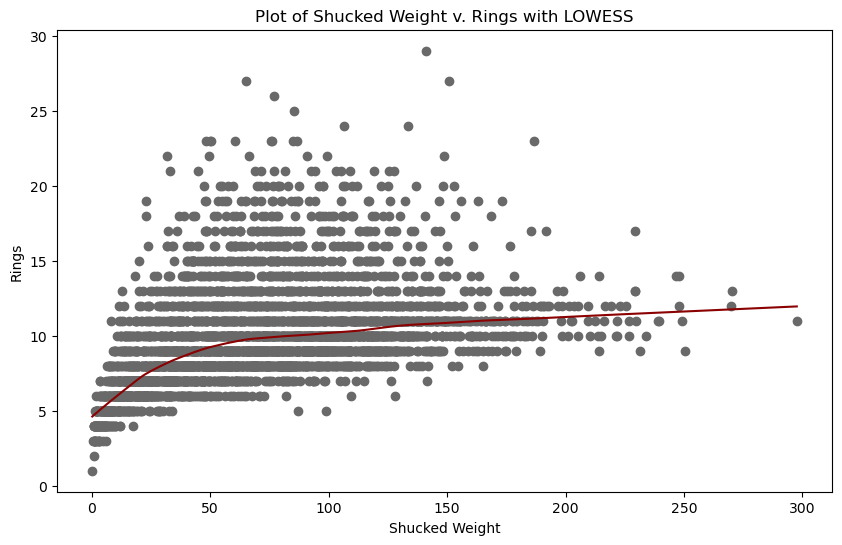

In [40]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Shucked Weight"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Shucked Weight"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Shucked Weight v. Rings with LOWESS")
axes.set_xlabel( "Shucked Weight")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

Similarly, its seems that there is a logarithmic trendline that depicts the more the shucked weighs, the more rings the abalone has. However, the trendline also caps out suggesting that once the abalone matures, its rate of gaining weight decreases. That is, as an infant abalone reaches maturity, there weight significantly increases. This may be due to the increase in side of meat of the abalone, visceras, and shell. However, the rate of weight of abalones significantly decreases once they reach maturity (> 11 rings). Abalones won't gain as much meat weight the older they get. 

#### RingsvsViscera_Weight

Given that the viscera is about 20% of the whole weight of the abalone, the assumption is that the Viscera Weight will behave very similar to the Whole Weight & Shucked Weight vs. number of rings. Let's see: 

In [41]:
correlation(abalone, "Viscera Weight", "Rings")

Correlation coefficients:
r   = 0.5038192487597712 (moderate)
rho = 0.6143438123140512 (moderate)


The correlation is moderate. This suggest that the viscera weight may be the an important feature to predicting the rings of an abalone and thus, its age. Let's visualize the relationship: 

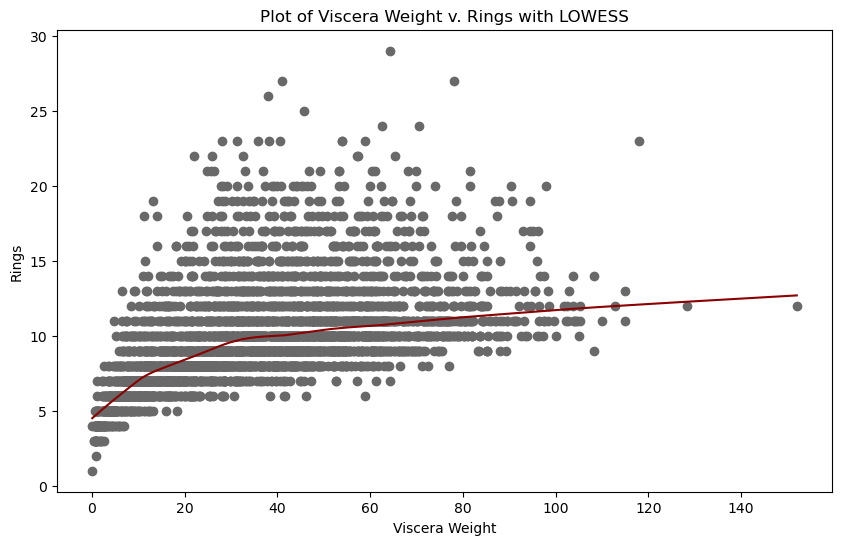

In [42]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Viscera Weight"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Viscera Weight"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Viscera Weight v. Rings with LOWESS")
axes.set_xlabel( "Viscera Weight")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

The viscera scatterplot behave exactly has the Shucked Weight and the Whole Weight. 

#### RingsvsShell_Weight

Lastly, given the shell weight accounts for about 30% of the Whole Weight, the assumption is that the bigger the shell, the more rings it has. Let's check out its correlation. 

In [43]:
correlation(abalone, "Shell Weight", "Rings")

Correlation coefficients:
r   = 0.627574044510321 (moderate)
rho = 0.6924745607793563 (strong)


Surprisingly, this feature has the strongest relationship to the target variable. That is, based on the previously features, the Shell weight may be the best indicators for number of rings and thus, age. Let's visualize the relationship:

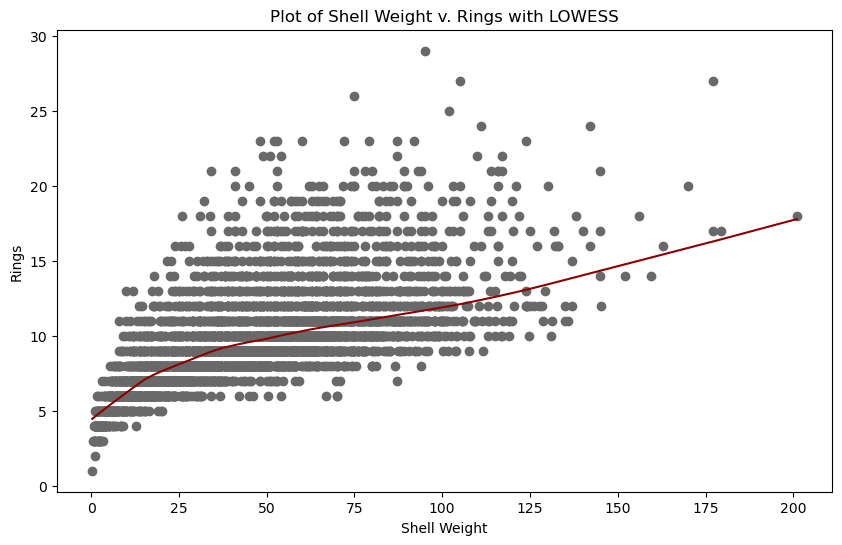

In [44]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess(abalone["Rings"], abalone["Shell Weight"], frac=.3)
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( abalone[ "Shell Weight"], abalone["Rings"], marker="o", color="DimGray")
axes.plot(lowess_x, lowess_y, color="DarkRed")

axes.set_title("Plot of Shell Weight v. Rings with LOWESS")
axes.set_xlabel( "Shell Weight")
axes.set_ylabel( "Rings")

plt.show()
plt.close()

Looking at the scatterplot and lowess line, it is easily denoted why this feature has the strongest relationship to rings. The logarithm trend line depicts the rate of growth of the shell tied exclusively to the time period where the abalone goes from infant to mature (0 - 9 rings). However, contrary to other weights of the abalone, the more rings the abalone gets and older the abalone gets,the shell appear continues to grow. In other words, it seems that the shell's rate of growth does not decrease as fast as to the Shucked (meat) and visceras of the abalone once it reaches maturity. 

## 3 <a id="step3">Statistical and Mathematical Modeling of the Target Variable</a>
<a href="#contents">^ Contents</a>

The following is the framework for statistical and mathematical modeling of the target variable: 

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.


### EDA

Since we have already done the EDA for our target variable in Problem 2, below are the summary statistics and histograms for our variable `Rings`.

In [45]:
abalone["Rings"].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

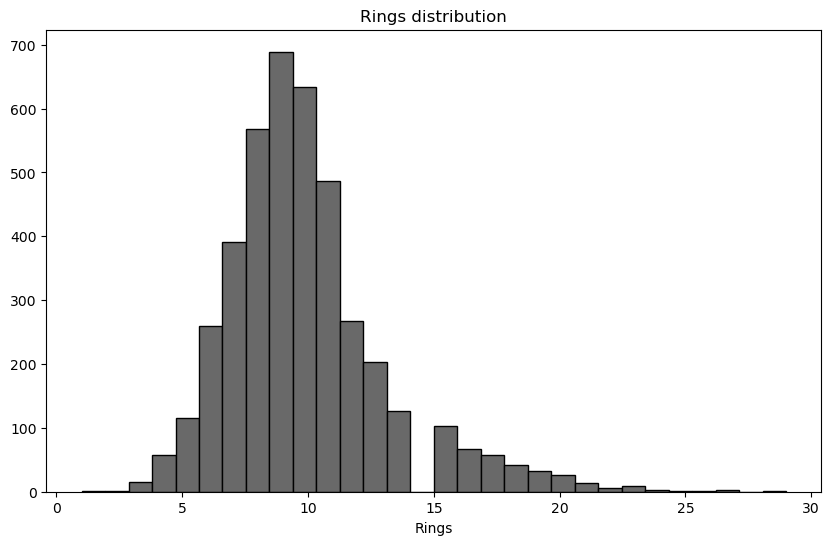

In [46]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(abalone[ "Rings"], histtype='bar', bins = 30, color="DimGray", ec='black')
axes.set_xlabel( "Rings")
axes.set_title("Rings distribution")

plt.show()
plt.close()

We had mention that based on the summary statistics, it looked like the data was slightly skewed right (mean: 9.93 > median: 9). Most of the dataset was centered between 9 - 11 rings, signifying the age of abalone are between 6 years old to 7 years old. We also had mentioned that given that 68% of the data is considered non-infant, it was fair to say that a mature abalone is between 9-11 rings. In other words, a mature abalone is considered to be between 6 - 7 years old.

Please refer to the following for more information: 

* [Rings](#Rings)


### Mean Model

We want to be able to predict the number of rings of an "random" abalone the next time we measure one. That is, what is the number rings the abalone will have the next time we measure another abalone? We want to penalize large errors more than small errors. Thus, using our mean squared error as our loss function we can use the mean as our predictor. Although we know that the data isn't normally distributed, assuming it is, we create the following mean model:

In [47]:
rings_mean = abalone["Rings"].mean()
print(rings_mean)

9.933684462532918


That is, looking at abalone at random, we can predict that the next abalone will have about 10 rings in it. 

But, what about error bounds? The standard deviation of rings in an abalone is: 

In [48]:
rings_std = abalone["Rings"].std()
print(rings_std)

3.2241690320681133


If we use the usual 95% error bounds, the lower ends and the upper ends are: 

In [49]:
print(f"({rings_mean - 1.96* rings_std}, {rings_mean + 1.96* rings_std})")

(3.6143131596794165, 16.25305576538642)


However, because our data isn't normally distributed, using the Chebyshev's inequality with k = 2 (two standard deviations), we note that the data only has a 75% error bound: 

In [50]:
print(f"({rings_mean - 2* rings_std}, {rings_mean + 2* rings_std})")

(3.4853463983966915, 16.382022526669147)


This is too big of a range that might not be good enough for our purposes. This is the error bounds on the abalone rings for the next abalone we might observe. 

### Data Generating Story 

Understanding the data generating story of how we collected our information can help us tremendously fit a model that could be use to create predictions. What we know is by knowing the age of an abalone and determining the min size limits between infants and non-infants through measurements of the features collected, we can maintain sufficent egg production to not overfarm these creatures.  With this said, it seems like the basic generating story for this story is that infants, males, and female abalones, when measured, are proportional to its ring numbers, weight, diameter, and height. This falls in line with the log-gaussian distribution. 

### Distribution Model  

Let's see how the log-gaussian distribution fits. This distribution should address the slight skewness associated with the histogram we viewed in the EDA.

In [53]:
abalone["log"] = abalone["Rings"].apply(lambda x: np.log10(x))

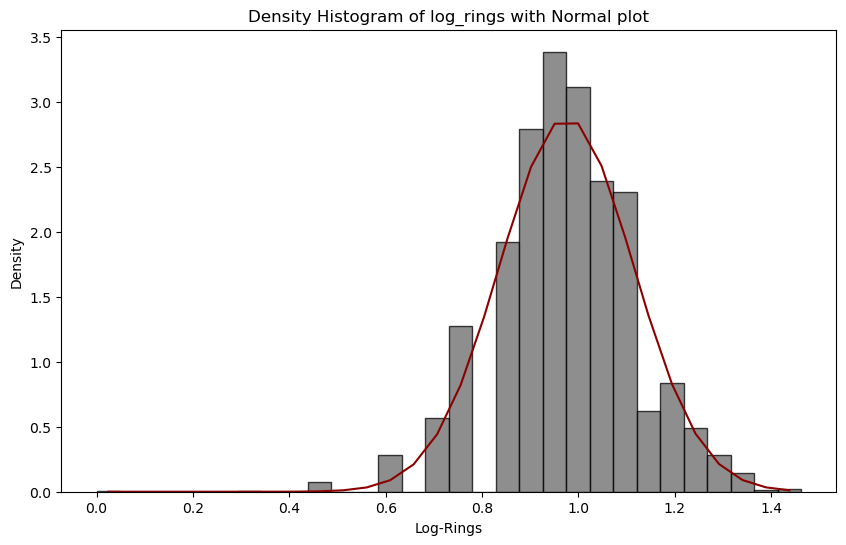

In [54]:
figure = plt.figure(figsize=(10,6))

axes = figure.add_subplot(1, 1, 1)
n, bins, patches = axes.hist(abalone["log"], color="DimGray", ec='black', density=True,bins=30, alpha=0.75)
axes.set_xlabel( "Log-Rings")
axes.set_ylabel( "Density")
axes.set_title("Density Histogram of log_rings with Normal plot")

xs = [(b2 + b1)/2 for b1, b2 in zip(bins, bins[1:])]    

mean = np.mean(abalone["log"])
std  = np.std(abalone["log"])
ys = [norm.pdf( k, loc=mean, scale=std) for k in xs]
axes.plot(xs, ys, color="darkred")

plt.show()
plt.close()

In this case, the model captures more effectively the right side of the bell curve although there is still underestimations on the especially about the mean. We must consider this we when appropiately used the model to do any predictions.  All in all, it allows to appropiately use this model to create predcitions. With this transformation, we conclude that the model fits better. We can now us this model to create predictions. Now it is important to relay what prediction model questions should look like:
1. What is the probability of finding an abalone with greater than 8 rings ? 
2. What is the probability of finding an abalone with less than 8 rings? 
3. What is the probability of finding an abalone with rings between 8 to 11 ?

In [55]:
print(f"1. {stats.norm.sf(np.log10(8),mean,std)}")
print(f"2. {stats.norm.cdf(np.log10(8),mean,std)}")
print(f"3. {stats.norm.cdf(np.log10(11),mean,std) - stats.norm.cdf(np.log10(8),mean,std)}")

1. 0.6985857496964801
2. 0.30141425030351987
3. 0.38170922631857596


Note: Since we fitted a log normal distribution and are using this as our model, we must get the log of any number of rings we would like to use. With this said, the results above fall in line with the categories of sexes for abalone. Assuming that an infant is considered an infant if it has 8 rings or less, 30% of the population were considered infants and about 69% of the population of abalone were considered non-infants (Males and Females).  



---

**CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.



*   Have you completed every section and answered every question asked?
*   For every question, have you described your approach and explained your results?
*   Have you checked for spelling and grammar errors?
*   Are your code blocks free of any errors?
*   Have you *SAVED* your notebook?
* Submit *THIS* notebook to the proper place in Blackboard.